Classification using scikit-learn

Step 1: import data

In [6]:
import pandas as pd
import numpy as np

In [7]:
# specify the location to the data file
data_file = "magic04.csv"

# define column names
var_names = [
    "fLength",
    "fWidth" ,
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class"
]

In [8]:
# read from text file
df_data = pd.read_csv(data_file, names=var_names)
df_data2 = df_data.copy()
# examine data types
df_data.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [9]:
print(df_data)

        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610   

2.	In this dataset, the dependent variable is class. It includes two categories: g and h. g represents gamma (signal), and h hadron (background). So, printing the value count of each category.

In [10]:
df_data['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

3.	All the other variables are independent variables. So,printing the histograms of the independent variables in matplotlib.

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


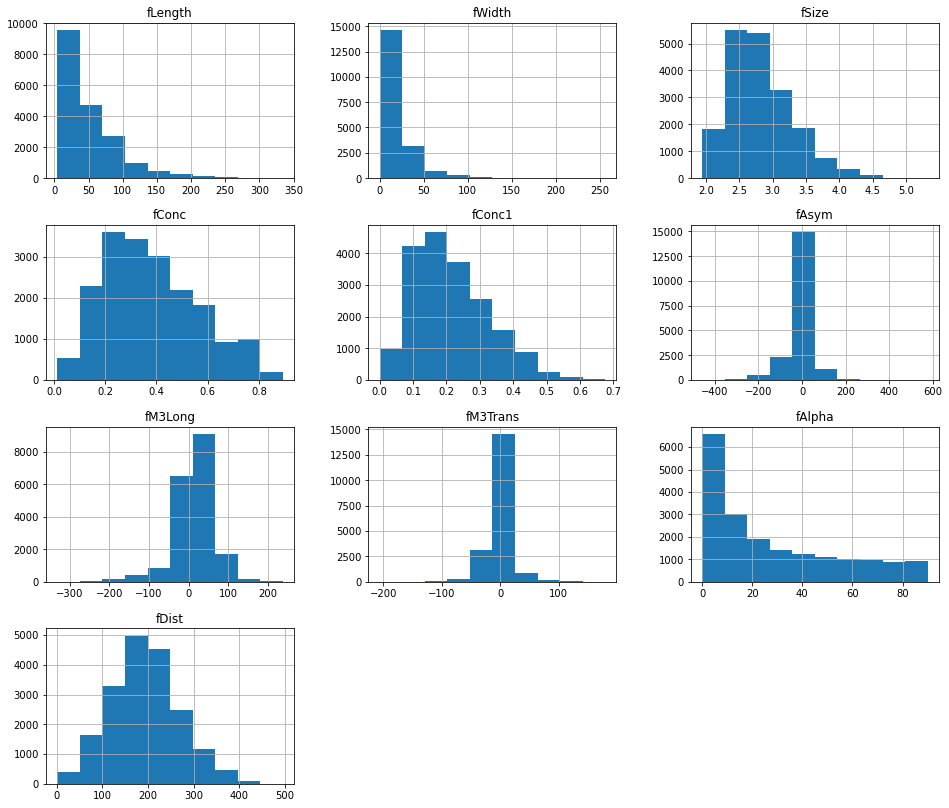

In [12]:
df_data.hist(figsize=(16, 14));

4.	printing the basic stats of each independent variable using the describe() method.

In [13]:
print(df_data[var_names].describe())

            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26

5. splitting the dataset into training and validation sets into 70%-30%.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
#split the dataset into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split
attributes = [col for col in var_names if col != "class"]
train_x1, test_x1, train_y1, test_y1 = train_test_split(df_data[attributes], df_data["class"], test_size=0.3, random_state=123) 

7.	using scikit-learn’s logistic regression classifier and fit a model using the training dataset. Then I run the classifier on the validation set. Printing the validation dataset classification report and Area Under the Receiver Operating Characteristic Curve (ROC AUC) for the validation set.

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(train_x1,train_y1)

In [ ]:
from sklearn.linear_model import LogisticRegression
# train model
log_regression.fit(train_x1,train_y1)
# make prediction
pred_y = log_regression.predict(test_x1)

# evaluate the prediction results
from sklearn.metrics import classification_report
for line in classification_report(test_y1, pred_y).split("\n"):
    print(line)

In [17]:
from sklearn import metrics

In [18]:
#use model to predict probability that given y value is 1
y_pred_proba = log_regression.predict_proba(test_x1)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(test_y1, y_pred_proba)

#print AUC score
print(auc)

0.8423561756017666


9. fitting SVM classifiers using the SVC function in scikit-learn. I did tune the SVM hyperparameter, C (default = 1.0), the Regularization parameter. You need to try each C in the list [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] using a FOR loop. In each iteration, please printing the validation set classification report and AUC. 

In [19]:
#split the dataset into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split
attributes = [col for col in var_names if col != "class"]
train_x1, test_x1, train_y1, test_y1 = train_test_split(df_data[attributes], df_data["class"], test_size=0.3, random_state=123) 

In [20]:
from sklearn.svm import SVC
svm = SVC()
# train model
svm.fit(train_x1, train_y1)
# make prediction
pred_y = svm.predict(test_x1)
# print evaluation measures
from sklearn.metrics import classification_report
for line in classification_report(test_y1, pred_y).split("\n"):
    print(line)

              precision    recall  f1-score   support

           g       0.81      0.96      0.88      3741
           h       0.87      0.58      0.70      1965

    accuracy                           0.83      5706
   macro avg       0.84      0.77      0.79      5706
weighted avg       0.83      0.83      0.82      5706



In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_score = svm.decision_function(test_x1)
fpr, tpr, thresholds = roc_curve(y_true=test_y1, y_score=y_score,pos_label = 1)
auc = roc_auc_score(y_true=test_y1, y_score=y_score)

In [22]:
print(auc)

0.8729619449698784


In [23]:
li = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for x in li:
    svm = SVC(C=x)
    # train model
    svm.fit(train_x1, train_y1)
    # make prediction
    pred_y = svm.predict(test_x1)
    # print evaluation measures
    from sklearn.metrics import classification_report
    for line in classification_report(test_y1, pred_y).split("\n"):
        print(line)

              precision    recall  f1-score   support

           g       0.80      0.95      0.87      3741
           h       0.85      0.54      0.66      1965

    accuracy                           0.81      5706
   macro avg       0.82      0.75      0.76      5706
weighted avg       0.82      0.81      0.80      5706

              precision    recall  f1-score   support

           g       0.80      0.95      0.87      3741
           h       0.86      0.56      0.68      1965

    accuracy                           0.82      5706
   macro avg       0.83      0.75      0.77      5706
weighted avg       0.82      0.82      0.80      5706

              precision    recall  f1-score   support

           g       0.81      0.95      0.87      3741
           h       0.86      0.56      0.68      1965

    accuracy                           0.82      5706
   macro avg       0.83      0.76      0.78      5706
weighted avg       0.82      0.82      0.81      5706

              preci

In [24]:
li = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for x in li:
    svm = SVC(C=x)
    # train model
    svm.fit(train_x1, train_y1)
    from sklearn.metrics import roc_curve, auc, roc_auc_score

    y_score = svm.decision_function(test_x1)
    fpr, tpr, thresholds = roc_curve(y_true=test_y1, y_score=y_score,pos_label = 1)
    auc = roc_auc_score(y_true=test_y1, y_score=y_score)
    print(auc)